# 1. Data Wrangling for Predicting Antibiotic Resistance in Gonorrhea

## 1.1 Introduction

The relevant data is contained in four separate files:
1. A csv file containing all strain samples and minimal inhibitory concentration (MIC) of azithromycin, ciprofloxacin, and ceftrixone
2. A space-separated files containing most common unitigs among resistant samples for each antibiotic:
<ul>
    <li>azithromycin(azm)</li>
    <li>ciprofloxacin(cip)</li>
    <li>cefixime(cfx)</li>
</ul>

In order to make models to predict MIC for each antibiotic, I will need each of the three unitig files to contain the MIC data for its respective antibiotic. Additional information of year and location data of samples may reveal insights during EDA, so they will be included as well.

## 1.2 Package Importing

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.3 Data Collection

### 1.3.1 Data Loading
I began by loading the three unitig files and the MIC data.

In [2]:
# Loading azithromycin data
unitigs_azm = pd.read_csv('../data/raw/azm_sr_gwas_filtered_unitigs.Rtab', sep='\s', engine='python')
unitigs_azm.head()

,pattern_id,ERR1549286,ERR1549290,ERR1549291,ERR1549287,ERR1549288,ERR1549299,ERR1549292,ERR1549298,ERR1549296,...,ERR2172345,ERR2172346,ERR2172347,ERR2172348,ERR2172349,ERR2172350,ERR2172351,ERR2172352,ERR2172353,ERR2172354
0,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,TACCGTAACCGGCAATGCGGATATTACGGTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Loading ciprofloxacin data
unitigs_cip = pd.read_csv('../data/raw/cip_sr_gwas_filtered_unitigs.Rtab', sep='\s', engine='python')
unitigs_cip.head()

,pattern_id,ERR1549286,ERR1549290,ERR1549291,ERR1549287,ERR1549288,ERR1549299,ERR1549292,ERR1549298,ERR1549296,...,ERR2172345,ERR2172346,ERR2172347,ERR2172348,ERR2172349,ERR2172350,ERR2172351,ERR2172352,ERR2172353,ERR2172354
0,ACGTTTATGCCGTTATCGATCCGATAGCCGGT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGA...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"CACAAAACTCGTTTCCTGCTCCGAAATGGGCGA,GTAAGGGCTTTC...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AAATCTTCCGCTTTAATCCATTTGCCGTCCGA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"AAACCTGCCGCAGCCGGCGCATCTTTGGGCGGCGGTCTGGAC,AAC...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Loading ceftrixone data
unitigs_cfx = pd.read_csv('../data/raw/cfx_sr_gwas_filtered_unitigs.Rtab', sep='\s', engine='python')
unitigs_cfx.head()

,pattern_id,ERR1549286,ERR1549290,ERR1549291,ERR1549287,ERR1549288,ERR1549299,ERR1549292,ERR1549298,ERR1549296,...,ERR2172345,ERR2172346,ERR2172347,ERR2172348,ERR2172349,ERR2172350,ERR2172351,ERR2172352,ERR2172353,ERR2172354
0,ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGAT...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GATATAACTGCGTCCGTCGGCATATTCGCCC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACCCCGCAACACCTCCTGCTCAACCGCAACGACCTCTTGGTCGGCGG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Loading the MIC data
mic_data = pd.read_csv('../data/raw/metadata.csv')
mic_data.head()

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
0,ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,...,-5.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,...,-7.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,NaN,>256,NaN,0.008,NaN,NaN,...,-6.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN


Given the size of the datasets and that only the respective column of MIC for each antibiotic will be joined to each unitig file, I will merge them after gaining more information from the individual files.

### 1.3.2 Extracting Relevant Columns from 'mic_data'

This dataset contains the samples and their MIC to azithromycin(azm), ciprofloxacin(cip), and cefixime(cfx) in addition to other processing of these MICs. As eventually I will be joining just the MIC of these antibiotics with the corresponding unitig data tables, I will focus on these columns as well as the Sample_ID, year, country, and continent of the sample.

In [6]:
# Extract 'Sample_ID', 'Year', 'Country', 'Continent', 'Azithromycin','Ciprofloxacin', and 'Cefixime' from'mic_data'
mic_data = mic_data[['Sample_ID', 'Year', 'Country', 'Continent', 'Azithromycin','Ciprofloxacin','Cefixime']]
mic_data.head()

,Sample_ID,Year,Country,Continent,Azithromycin,Ciprofloxacin,Cefixime
0,ERR1549286,2015.0,UK,Europe,>256,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,>256,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,>256,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,>256,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,>256,NaN,NaN


## 1.4 Data Definition

### 1.4.1 Renaming Columns

I renamed the 'Azithromycin', 'Ciprofloxacin', and 'Cefixime' columns to be more accurate as they are the MIC to each antibiotic. The remaining columns are descriptive for what they contain.

In [7]:
# Rename MIC columns
mic_data = mic_data.rename(columns = {'Azithromycin':'mic_azm','Ciprofloxacin':'mic_cip','Cefixime':'mic_cfx'})
mic_data.head()

,Sample_ID,Year,Country,Continent,mic_azm,mic_cip,mic_cfx
0,ERR1549286,2015.0,UK,Europe,>256,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,>256,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,>256,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,>256,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,>256,NaN,NaN


### 1.4.2 Checking Data Types
#### 1.4.2.1 Unitig Data

In [8]:
# Checking info of unitig data
print('unitigs_azm info:')
print(unitigs_azm.info())
print('unitigs_cip info:')
print(unitigs_cip.info())
print('unitigs_cfx info:')
print(unitigs_cfx.info())

unitigs_azm info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Columns: 3972 entries, pattern_id to ERR2172354
dtypes: int64(3971), object(1)
memory usage: 15.6+ MB
None
unitigs_cip info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8873 entries, 0 to 8872
Columns: 3972 entries, pattern_id to ERR2172354
dtypes: int64(3971), object(1)
memory usage: 268.9+ MB
None
unitigs_cfx info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Columns: 3972 entries, pattern_id to ERR2172354
dtypes: int64(3971), object(1)
memory usage: 11.6+ MB
None


All the unitig dataframes contain one object ('sample_id') column and the rest as integers.

In [9]:
# Checking info of mic_data
print(mic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample_ID  3786 non-null   object 
 1   Year       3536 non-null   float64
 2   Country    3785 non-null   object 
 3   Continent  3785 non-null   object 
 4   mic_azm    3480 non-null   object 
 5   mic_cip    3129 non-null   object 
 6   mic_cfx    3405 non-null   object 
dtypes: float64(1), object(6)
memory usage: 207.2+ KB
None


'Year' is a float and the rest are objects. The MIC columns should all be floats, so this requires further investigation.

### 1.4.3 Value Counts

#### 1.4.3.1 Unitig Data
The unitig data should contain only contain values of 0 (unitig present in sample) or 1 (unitig not present in sample). To I double checked that all sample fields only contained either a 0 or 1.

In [10]:
# Set index to 'pattern id'
unitigs_azm = unitigs_azm.set_index('pattern_id')
unitigs_cip = unitigs_cip.set_index('pattern_id')
unitigs_cfx = unitigs_cfx.set_index('pattern_id')

In [11]:
# Find any samples with values that are not 0 or 1:
for df in [unitigs_azm, unitigs_cip, unitigs_cfx]:
    for key, value in df.items():
        unique = list(df[key].unique())
        if unique not in [[0,1],[1,0]]:
            print(key, df[key].unique())

As no samples were printed, all data is either a 0 or 1. This means I can sum the columns or rows to receive the counts of number of unitigs found in each sample and times each unitig is present.

In [12]:
# Sum each column for total unitigs found in each sample
print('unitigs_azm: Total Unitigs by Sample\n',unitigs_azm.sum().describe())
print('\nunitigs_cip: Total Unitigs by Sample\n',unitigs_cip.sum().describe())
print('\nunitigs_cfx: Total Unitigs by Sample\n',unitigs_cfx.sum().describe())

unitigs_azm: Total Unitigs by Sample
 count    3971.000000
mean      202.209519
std         8.428775
min        10.000000
25%       199.000000
50%       203.000000
75%       206.000000
max       253.000000
dtype: float64

unitigs_cip: Total Unitigs by Sample
 count    3971.000000
mean     4445.179048
std       158.716330
min       115.000000
25%      4403.000000
50%      4468.000000
75%      4506.000000
max      5074.000000
dtype: float64

unitigs_cfx: Total Unitigs by Sample
 count    3971.000000
mean      173.122891
std         7.170574
min         7.000000
25%       170.000000
50%       174.000000
75%       177.000000
max       201.000000
dtype: float64


All datasets have a median and mean around half of number of unitigs present with the minimum number of unitigs being 7 in one sample for cfx. The maximums for each dataset were far below the number of unitigs, indicating that the unitigs present are not overly shared by the samples and thus have potential for predicting resistance.

In [13]:
unitig_sum_map = {
    'azm: total unitigs in sample':unitigs_azm.sum(),
    'cip: total unitigs in sample':unitigs_cip.sum(),
    'cfx: total unitigs in sample':unitigs_cfx.sum()
}
unitigs_sum_by_sample = pd.concat(unitig_sum_map,axis=1)

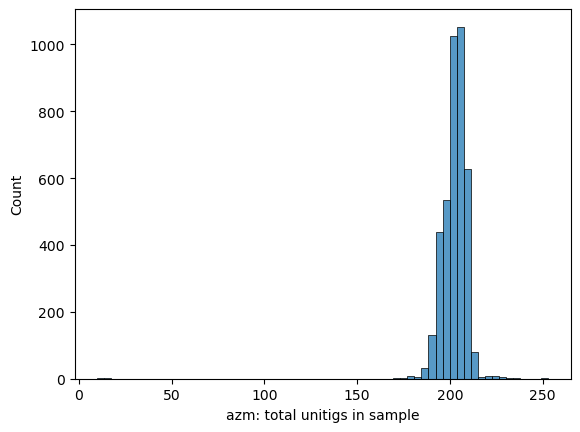

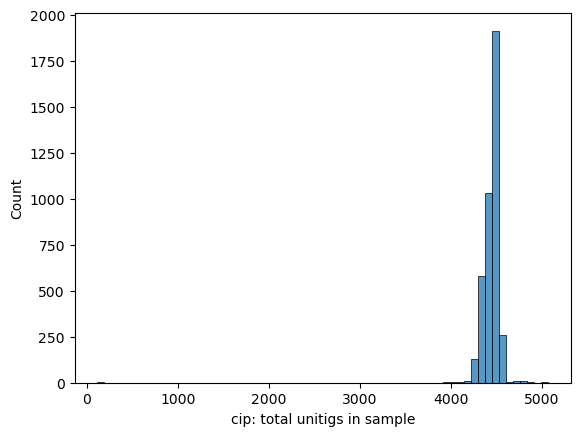

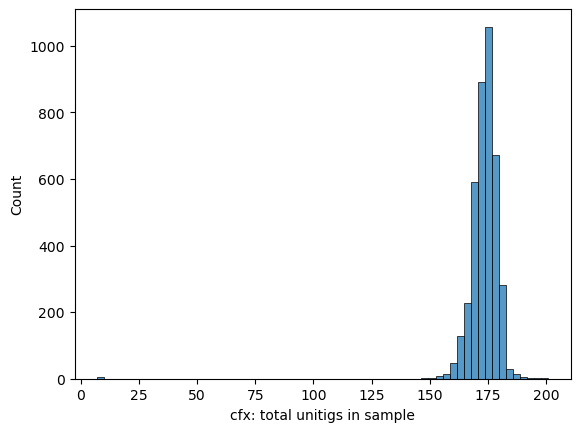

In [14]:
# Create histograms for total samples for each unitig
for col in unitigs_sum_by_sample.columns:
    g = sns.histplot(x=col,data=unitigs_sum_by_sample,bins=64)
    plt.show()

There are extremely few samples with small numbers of unitigs present.

In [15]:
# Sum each row for total samples with each unitig
print('unitigs_azm: Total Samples by Unitig\n',unitigs_azm.sum(axis=1).describe())
print('\nunitigs_cip: Total Samples by Unitig\n',unitigs_cip.sum(axis=1).describe())
print('\nunitigs_cfx: Total Samples by Unitig\n',unitigs_cfx.sum(axis=1).describe())

unitigs_azm: Total Samples by Unitig
 count     515.000000
mean     1559.172816
std      1770.858424
min         1.000000
25%         3.000000
50%       310.000000
75%      3889.000000
max      3971.000000
dtype: float64

unitigs_cip: Total Samples by Unitig
 count    8873.000000
mean     1989.384199
std      1801.726428
min         1.000000
25%        15.000000
50%      2050.000000
75%      3944.000000
max      3971.000000
dtype: float64

unitigs_cfx: Total Samples by Unitig
 count     384.000000
mean     1790.289062
std      1801.666775
min         1.000000
25%         3.000000
50%       862.000000
75%      3909.500000
max      3968.000000
dtype: float64


Similar results are seen for total samples by unitig. Each unitig is present in at least one sample for each data set.

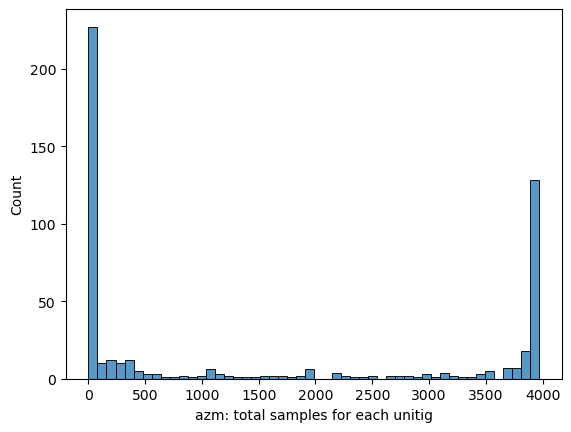

In [16]:
# Create histogram for total samples for each unitig for azm
g = sns.histplot(x=unitigs_azm.sum(axis=1),bins=50)
g.set(xlabel='azm: total samples for each unitig')
plt.show()

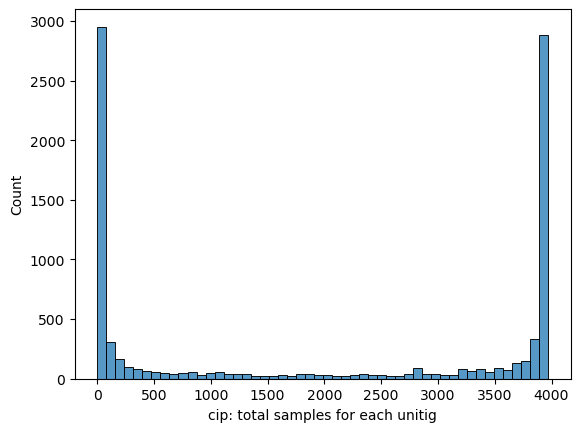

In [17]:
# Create histogram for total samples for each unitig for cip
g = sns.histplot(x=unitigs_cip.sum(axis=1),bins=50)
g.set(xlabel='cip: total samples for each unitig')
plt.show()

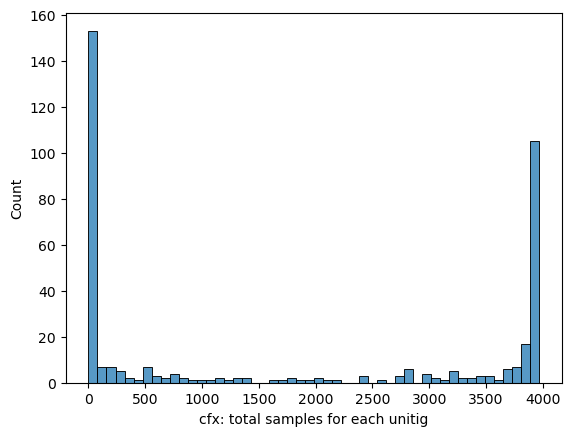

In [18]:
# Create histogram for total samples for each unitig for cfx
g = sns.histplot(x=unitigs_cfx.sum(axis=1),bins=50)
g.set(xlabel='cfx: total samples for each unitig')
plt.show()

For the total samples containing each unitig, there is a very wide distribution with peaks close to 1 and 3791 (the total number of samples).

#### 1.4.3.2 Year
I then defined a function to produce a value count by count and percent to explore further.

In [19]:
# Define function to count objects
def count_obj(df,col):
    """For the designated column col in the DataFrame df,
        produce a value count as a count and as a percentage"""
    count = pd.concat([df[col].value_counts(),
            df[col].value_counts()/df[col].notnull().sum()*100], axis = 1)
    count.columns = ['count','%']
    return count

In [20]:
# Print description and value counts for year
print(mic_data['Year'].describe())
print(count_obj(mic_data,'Year'))

count    3536.000000
mean     2010.300622
std         4.670817
min      1979.000000
25%      2009.000000
50%      2012.000000
75%      2013.000000
max      2017.000000
Name: Year, dtype: float64
        count          %
2013.0   1196  33.823529
2015.0    439  12.415158
2010.0    284   8.031674
2011.0    275   7.777149
2012.0    222   6.278281
2009.0    219   6.193439
2004.0    126   3.563348
2007.0    113   3.195701
1998.0     99   2.799774
2005.0     82   2.319005
2008.0     78   2.205882
2002.0     59   1.668552
2006.0     53   1.498869
2000.0     51   1.442308
2014.0     49   1.385747
2001.0     47   1.329186
2003.0     40   1.131222
2016.0     32   0.904977
1999.0     29   0.820136
1997.0     11   0.311086
2017.0      8   0.226244
1989.0      5   0.141403
1993.0      5   0.141403
1990.0      3   0.084842
1991.0      3   0.084842
1996.0      3   0.084842
1992.0      2   0.056561
1986.0      1   0.028281
1979.0      1   0.028281
1994.0      1   0.028281


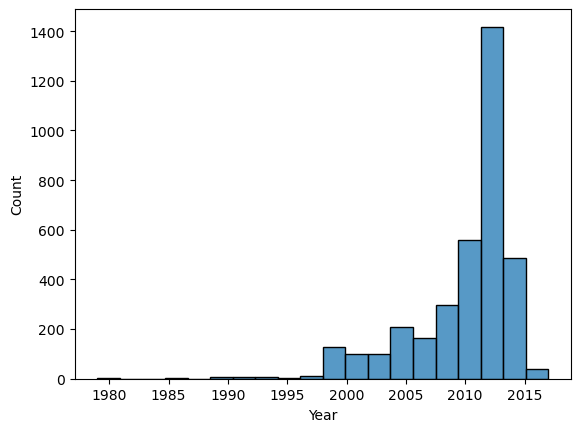

In [21]:
# Make histogram of year
sns.histplot(x=mic_data['Year'],bins=20);

The samples are from 1979 to 2017 with most from 2009 to 2013. 2013 was the most common year with 33.8% of the samples. This makes the samples fairly recent enough to year responsible results.

#### 1.4.3.3 Continent and Country

In [22]:
# Print counts for 'Continent' and 'Country'
print('Continent')
print(count_obj(mic_data,'Continent'))
print('Country')
print(count_obj(mic_data,'Country'))

Continent
         count          %
Europe    1675  44.253633
America   1505  39.762219
Oceania    411  10.858653
Asia       150   3.963012
Africa      44   1.162483
Country
             count          %
USA           1121  29.616909
UK             493  13.025099
New_Zealand    400  10.568032
Canada         372   9.828269
Spain          132   3.487450
...            ...        ...
Chile            1   0.026420
Ecuador          1   0.026420
Caribbean        1   0.026420
Romania          1   0.026420
Lithuania        1   0.026420

[65 rows x 2 columns]


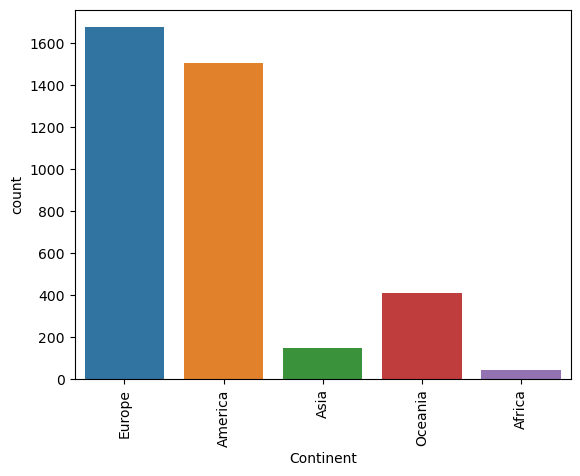

In [23]:
sns.countplot(x='Continent',data=mic_data)
plt.xticks(rotation=90);

In [24]:
# Find all countries that only occur once
mic_data.groupby('Country').filter(lambda x: len(x) == 1)['Country'].unique()


array(['Chile', 'Ecuador', 'Caribbean', 'Romania', 'Lithuania',
       'Argentina', 'Armenia', 'Bulgaria', 'Finland', 'Uganda', 'Angola',
       'Guinea', 'Saudi_Arabia'], dtype=object)

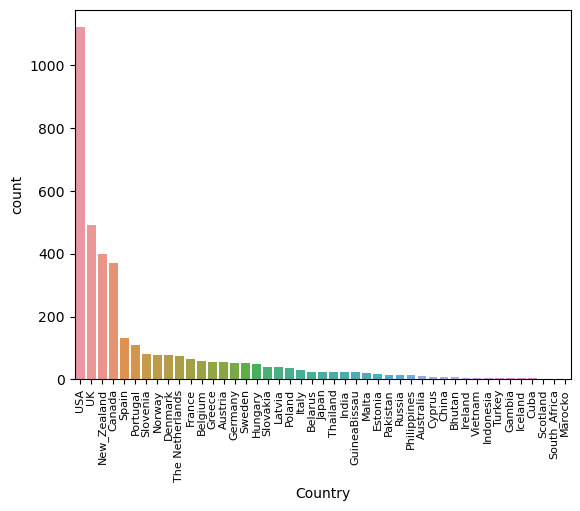

In [25]:
recurring_countries = mic_data.groupby('Country').filter(lambda x: len(x) > 2)
sns.countplot(x='Country',data=recurring_countries,order=recurring_countries['Country'].value_counts().index)
plt.xticks(fontsize=8,rotation=90);

Most samples are from Europe and America, with 29.6% from the USA and 13.0% from the UK, indicating that a model generated by this data may be most accurate in these regions.

#### 1.4.3.4 MIC data

In [26]:
# Find count of 'mic_azm'
count_obj(mic_data,'mic_azm')

,count,%
0.25,698,20.057471
0.5,697,20.028736
0.125,297,8.534483
1,277,7.959770
2,186,5.344828
8,151,4.339080
0.12,110,3.160920
0.06,107,3.074713
>256,101,2.902299
0.19,97,2.787356


In [27]:
def check_non_numeric(df,col):
    """Finds value counts of non-numeric data in a column."""
    non_numeric = df[col].apply(pd.to_numeric,errors='coerce').isnull()
    non_numeric_counts = df[non_numeric][col].value_counts()
    return non_numeric_counts

In [28]:
check_non_numeric(mic_data,'mic_azm')

>256           101
>=512            3
<=0.008          1
>=64/>=512       1
>=256/>=512      1
Name: mic_azm, dtype: int64

The 'mic_azm' column mostly contains floats but there are 5 distinct floats: 4 where the sample was not inhibited by the maximum concentration of azm used in its study (>256, >=512, >=256/>=512, >=64/>=512) and 1 where the sample was inhibited by the minimum concentration used (<=0.008).

This poses two issues:
1. Before getting more accurate summary statistics on theses, I needed to replace these with floats and convert the datatype of the column. 
2. MIC of >=256/>=512 or >=64/>=512 provides a very large range of possible MICs.

The first issue can be solved by replacing said values with the most accurate MIC. As MIC is determined by dilution, our safest assumption that twice the maximum concentration is the most accurate MIC, so 512 for >256 and 1024 for >=512. It is important to retain these values as they are the most resistant to the antibiotic. Similarly, for <=0.008, we will assume an MIC of one dilution further: 0.004, which is still far below most values and well within the sensitive range for the antibiotic.

For the second issue, these values reflect 2 samples and can therefore be replaced with None values given the size of our data set.

With 'mic_azm' all numbers, I next checked 'mic_cip'.

In [29]:
# Find count of 'mic_cip'
count_obj(mic_data,'mic_cip')

,count,%
16,483,15.436242
0.004,412,13.167146
0.015,357,11.409396
32,329,10.514541
0.002,244,7.798019
8,229,7.318632
4,196,6.263982
0.008,147,4.697987
0.003,114,3.643337
0.03,114,3.643337


In [30]:
check_non_numeric(mic_data,'mic_cip')

S         26
R         15
>32       12
<0.002     3
>=32       2
>0.5       1
>16        1
Name: mic_cip, dtype: int64

7 values pose issues: 'R', 'S', '>32', '<0.002', '>=32', '>0.5', and '>16'. The maximums/minimums can be treated as before, but 'R' and 'S' stand for resistant and sensitive, which is not helpful with my goal being to predict MIC. As these account for 41 values out of 3129, they can be replaced with None.

In [31]:
# Find count of 'mic_cfx'
count_obj(mic_data,'mic_cfx')

,count,%
0.016,916,26.901615
0.008,400,11.747430
0.015,332,9.750367
0.03,324,9.515419
0.25,307,9.016153
0.125,195,5.726872
0.06,181,5.315712
0.032,147,4.317181
0.023,105,3.083700
0.004,104,3.054332


In [32]:
check_non_numeric(mic_data,'mic_cfx')

<0.016     33
S           2
< 0.016     2
<=0.032     1
>=4         1
Name: mic_cfx, dtype: int64

Again there are issues: 'S', '<0.016', '< 0.016', '<=0.032', and '>=4', but they can all be treated as described earlier.

In [33]:
# Set replacement dictionary
mic_replace = {'>=256/>=512':None, # for mic_azm
               '>=64/>=512':None,
               '>256':512,
               '>=512':1024,
               '<=0.008':0.004,
               'R':None, # for mic_cip
               'S':None,
               '>32':64,
               '<0.002':0.001,
               '>=32':64,
               '>0.5':1,
               '>16':32,
               '<0.016':0.008, # for mic_cfx
               '< 0.016':0.008,
               '<=0.032':0.016,
               '>=4':8
              }

# Replace non-float values in 'mic_azm','mic_cip','mic_cfx'
for col in ['mic_azm','mic_cip','mic_cfx']:
    mic_data[col] = mic_data[col].replace(mic_replace)

Now the three MIC columns can be converted to floats.

In [34]:
for col in ['mic_azm','mic_cip','mic_cfx']:
    mic_data[col] = mic_data[col].astype(float)
mic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample_ID  3786 non-null   object 
 1   Year       3536 non-null   float64
 2   Country    3785 non-null   object 
 3   Continent  3785 non-null   object 
 4   mic_azm    3478 non-null   float64
 5   mic_cip    3088 non-null   float64
 6   mic_cfx    3403 non-null   float64
dtypes: float64(4), object(3)
memory usage: 207.2+ KB


### 1.4.4 Summary Statistics of MICs

In [35]:
# Describe 'mic_azm'
mic_data.describe()

,Year,mic_azm,mic_cip,mic_cfx
count,3536.000000,3478.000000,3088.000000,3403.000000
mean,2010.300622,17.118781,7.428788,0.064372
std,4.670817,90.864520,11.266796,0.199098
min,1979.000000,0.004000,0.001000,0.001000
25%,2009.000000,0.125000,0.004000,0.015000
50%,2012.000000,0.380000,0.094000,0.016000
75%,2013.000000,1.000000,16.000000,0.060000
max,2017.000000,1024.000000,64.000000,8.000000


The range of 'mic_azm' is 0.004 to 1024, which is expectedly two values I set due to being outside the minimum/maximum range of concentrations tested. The median is 0.38, which is in the intermediate resistance range. 'mic_cip' ranges from 0.001 to 64 and has a median of 0.094 (intermediate resistance). 'mic_cfx' ranges fom 0.001 to 8 with a median of 0.016 (sensitive to antibiotic). All three have means higher than their medians and are therefore left skewed.

### 1.4.5 Antibiotic Resistance

I next wanted to see the antibiotic resistance of the samples. This can be determined by the MIC as follows:
<table>
  <tr>
    <th>Antibiotic</th>
    <th>Resistant (R)</th>
  </tr>
  <tr>
    <td>Azithromycin</td>
    <td>> 0.50 mg/L</td>
  </tr>
  <tr>
    <td>Ciprofloxacin</td>
    <td>> 1.00 μg/mL</td>
  </tr>
    <tr>
    <td>Cefixime</td>
    <td>> 0.125 mg/L</td>
  </tr>
</table>


In [36]:
# Set ranges for S,I,R
range_azm = [0,0.50,np.inf]
range_cip = [0,1,np.inf]
range_cfx = [0,0.125,np.inf]

# Set labels for bins
labels = [0,1]

# Add columns for resistance for azm, cip, and cfx
mic_data['r_azm'] = pd.cut(mic_data['mic_azm'],range_azm,labels=labels)
mic_data['r_cip'] = pd.cut(mic_data['mic_cip'],range_cip,labels=labels)
mic_data['r_cfx'] = pd.cut(mic_data['mic_cfx'],range_cfx,labels=labels)

In [37]:
print('azm: \n',count_obj(mic_data, 'r_azm'))
print('cip: \n',count_obj(mic_data,'r_cip'))
print('cfx: \n',count_obj(mic_data,'r_cfx'))

azm: 
    count          %
0   2502  71.937895
1    976  28.062105
cip: 
    count          %
0   1660  53.756477
1   1428  46.243523
cfx: 
    count          %
0   3020  88.745225
1    383  11.254775


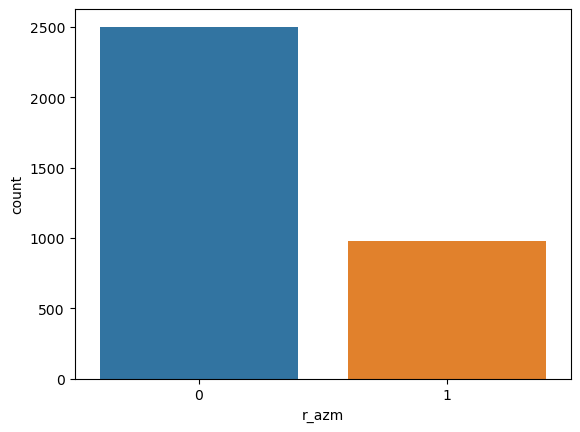

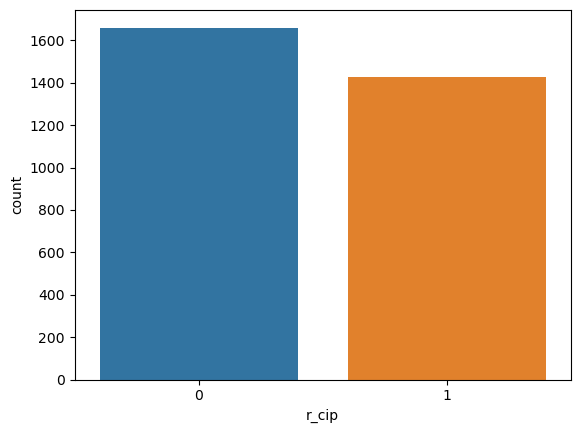

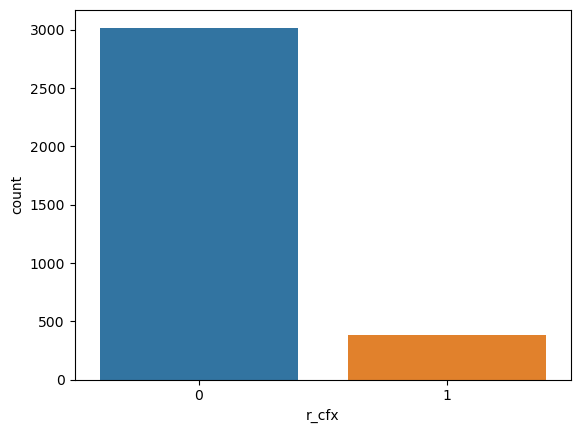

In [38]:
for col in ['r_azm','r_cip','r_cfx']:
    sns.countplot(x=col,data=mic_data)
    plt.show()

The majority of the samples are sensitive to at least one antibiotic. Cfx has the most effectiveness with 89% of the samples being sensitve and the fewest sampbles being resistant (11%). Cip has the most resistance strains at 46%, which is expected as it was used as a frontline treatment before cfx and azm.

## 1.5 Data Joining

Each unitig file needs the samples' MIC data for the respective antibiotic.

In [39]:
# Print shape of each DataFrame
print("mic_data shape: " + str(mic_data.shape))
print("unitigs_azm shape: " + str(unitigs_azm.shape))
print("unitigs_cip shape: " + str(unitigs_cip.shape))
print("unitigs_cfx shape: " + str(unitigs_cfx.shape))


mic_data shape: (3786, 10)
unitigs_azm shape: (515, 3971)
unitigs_cip shape: (8873, 3971)
unitigs_cfx shape: (384, 3971)


mic_data's rows contain the sample id's while the unitig files have the sample id's as columns, so I will transpose them. Additionally, the 'mic_data' has 3786 rows while the unitigs all have 3972 columns, so some samples might not have MIC data.

In [40]:
# Transpose
unitigs_azm_T = unitigs_azm.T

# Reset index and rename column 'Sample_ID' to match mic_data
unitigs_azm_T.reset_index(inplace=True)
unitigs_azm_T = unitigs_azm_T.rename(columns = {'index':'Sample_ID'})
unitigs_azm_T.head()

pattern_id,Sample_ID,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,ERR1549286,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,ERR1549290,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,ERR1549291,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,ERR1549287,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,ERR1549288,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


As I will merge on 'Sample_ID', I wanted to compare the sample id's in the unitig data to the MIC data.

In [41]:
# Check if samples in 'mic_data' are in 'unitigs_azm_T'
print('samples from mic_data that are in unitigs_azm_T:\n',
      mic_data['Sample_ID'].isin(unitigs_azm_T['Sample_ID']).value_counts())
# Check samples in 'unitig_azm_T' are in 'mic_data'
print('samples from unitigs_azm_T that are in mic_data:\n',
      unitigs_azm_T['Sample_ID'].isin(mic_data['Sample_ID']).value_counts())

samples from mic_data that are in unitigs_azm_T:
 True    3786
Name: Sample_ID, dtype: int64
samples from unitigs_azm_T that are in mic_data:
 True     3786
False     185
Name: Sample_ID, dtype: int64


All of the samples from 'mic_data' are in 'unitigs_azm_T' but 185 samples are not in 'mic_data'

In [42]:
# Joining with 'mic_data' column 'mic_azm' on 'Sample_ID'
unitigs_azm = mic_data[['Sample_ID','mic_azm','r_azm','Year','Country','Continent']].merge(unitigs_azm_T, 
                                how = 'right', on = 'Sample_ID')
unitigs_azm = unitigs_azm.set_index('Sample_ID')
unitigs_azm.head()

,mic_azm,r_azm,Year,Country,Continent,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
Sample_ID,,,,,,,,,,,,,,,,,,,,,
ERR1549286,512.0,1,2015.0,UK,Europe,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549290,512.0,1,2015.0,UK,Europe,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549291,512.0,1,2015.0,UK,Europe,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549287,512.0,1,2015.0,UK,Europe,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549288,512.0,1,2015.0,UK,Europe,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


Now to repeat for cip and cfx.

In [43]:
# Transpose
unitigs_cip_T = unitigs_cip.T

# Reset index and rename column 'Sample_ID' to match mic_data
unitigs_cip_T.reset_index(inplace=True)
unitigs_cip_T = unitigs_cip_T.rename(columns = {'index':'Sample_ID'})

# Again for cfx
unitigs_cfx_T = unitigs_cfx.T
unitigs_cfx_T.reset_index(inplace=True)
unitigs_cfx_T = unitigs_cfx_T.rename(columns = {'index':'Sample_ID'})


Before joining, I confirmed that the sample id's in unitig dataframe were the same as in unitigs_azm_T, and therefore the same as mic_data

In [44]:
# Check samples are the same in all three datasets:
print('samples from unitigs_azm_T that are in unitigs_cip_T:\n',
      unitigs_azm_T['Sample_ID'].isin(unitigs_cip_T['Sample_ID']).value_counts())
print('samples from unitigs_azm_T that are in unitigs_cfx_T:\n',
      unitigs_azm_T['Sample_ID'].isin(unitigs_cfx_T['Sample_ID']).value_counts())


samples from unitigs_azm_T that are in unitigs_cip_T:
 True    3971
Name: Sample_ID, dtype: int64
samples from unitigs_azm_T that are in unitigs_cfx_T:
 True    3971
Name: Sample_ID, dtype: int64


In [45]:
# Joining unitigs_cip with 'mic_data' column 'mic_cip' on Sample_ID'
unitigs_cip = mic_data[['Sample_ID','mic_cip','r_cip','Year','Country','Continent']].merge(unitigs_cip_T, 
                                how = 'right', on = 'Sample_ID')
unitigs_cip = unitigs_cip.set_index('Sample_ID')

In [46]:
# Joining unitigs_cfx with 'mic_data' column 'mic_cfx' on Sample_ID'
unitigs_cfx = mic_data[['Sample_ID','mic_cfx','r_cfx','Year','Country','Continent']].merge(unitigs_cfx_T, 
                                how = 'right', on = 'Sample_ID')
unitigs_cfx = unitigs_cfx.set_index('Sample_ID')

## 1.6 Data Cleaning

### 1.6.1 Missing Values


In [47]:
# Check missing values
for df in [unitigs_azm, unitigs_cip, unitigs_cfx]:
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns = ['count','%']
    print(missing.head())

           count          %
mic_azm      493  12.415009
r_azm        493  12.415009
Year         435  10.954420
Country      186   4.683959
Continent    186   4.683959
           count          %
mic_cip      883  22.236213
r_cip        883  22.236213
Year         435  10.954420
Country      186   4.683959
Continent    186   4.683959
           count          %
mic_cfx      568  14.303702
r_cfx        568  14.303702
Year         435  10.954420
Country      186   4.683959
Continent    186   4.683959


In each dataframe, the only missing values are for MIC. This is most likely due to these samples not being tested for the antibiotic. Because MIC is my target feature, I will drop samples missing MIC data. For azm this will be 12.4% of the samples and 14.3% for cfx. Cip has a larger amount of missing values at 22.2%, which still leaves over 3,000 samples to work with.
Year data is missing consistently for 11% of the samples and location data for 4.7%, but this is not hugely important as these will be used for analysis of the data but not as features in the modeling.

### 1.6.2 Duplicate values

#### 1.6.2.1 Checking for Duplicate Samples

In [48]:
# Check duplicate samples
for df in [unitigs_azm, unitigs_cip, unitigs_cfx]:
    # Reset index to extract 'Sample_ID' column
    unique_test = df.reset_index()
    # Print if values of 'Sample_ID' are unique
    print(unique_test['Sample_ID'].is_unique)

True
True
True


All sample id's are unique.

#### 1.6.2.2 Checking for Duplicate Unitigs

In [49]:
# Check duplicate samples
for df in [unitigs_azm, unitigs_cip, unitigs_cfx]:
    # Extract column names (the unitigs)
    unique_test = df.columns
    # Print unique
    print(unique_test.is_unique)

True
True
True


All unitigs are unique.

### 1.6.3 Final Clean up

#### 1.6.3.1 Dropping samples missing MIC values

In [50]:
# Drop missing MIC values in azm
missing_mic_azm = unitigs_azm.iloc[:,0].isnull()
unitigs_azm = unitigs_azm[missing_mic_azm == False]
print('azm\n',unitigs_azm.iloc[:,0].isnull().sum())

# Drop missing MIC values in cip
missing_mic_cip = unitigs_cip.iloc[:,0].isnull()
unitigs_cip = unitigs_cip[missing_mic_cip == False]
print('cip\n',unitigs_cip.iloc[:,0].isnull().sum())

# Drop missing MIC values in cfx
missing_mic_cfx = unitigs_cfx.iloc[:,0].isnull()
unitigs_cfx = unitigs_cfx[missing_mic_cfx == False]
print('cfx\n',unitigs_cfx.iloc[:,0].isnull().sum())

azm
 0
cip
 0
cfx
 0


Now none of the MIC values are missing from the data.

Now all dataframes contain one float (MIC) and all unitigs are ints. I then double checked that there are no missing values.

In [51]:
# Check missing values
for df in [unitigs_azm, unitigs_cip, unitigs_cfx]:
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns = ['count','%']
    print(missing.head())

           count         %
mic_azm        0  0.000000
r_azm          0  0.000000
Year         250  7.188039
Country        1  0.028752
Continent      1  0.028752
           count         %
mic_cip        0  0.000000
r_cip          0  0.000000
Year         250  8.095855
Country        1  0.032383
Continent      1  0.032383
           count         %
mic_cfx        0  0.000000
r_cfx          0  0.000000
Year          46  1.351748
Country        1  0.029386
Continent      1  0.029386


## 1.7 Save Data

Saving the data in the interim folder.

In [52]:
# Export as csv
unitigs_azm.to_csv('../data/interim/azm_data.csv')

In [53]:
unitigs_cip.to_csv('../data/interim/cip_data.csv')

In [54]:
unitigs_cfx.to_csv('../data/interim/cfx_data.csv')

## 1.8 Summary

The original MIC data contained 3786 samples and the unitig data 3971 samples, with azm containing 520 unitigs, cip 8878, and cfx 389. Through this process I extracted the MIC from the MIC data with year and location data, correcting MIC by dropping ambiguous values and replacing concentrations listed as above a maximum with twice the maximum concentration and below the minimum with half the minimum concentration. The MIC was converted to a float and allowed me to create categories of resistance (resistant, sensitive, or intermediate) for EDA before joining with the unitigs.
I did not remove any unitigs as each unitig was present at least once in the samples. I am considering dropping infrequent unitigs but will wait until further analysis. While there were no duplicate values, MIC data was missing for all three antibiotics. Because MIC is my target feature, I dropped samples without MIC data.